In [4]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 10.6/10.6 MB 8.4 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 10.7 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 8.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [5]:
dados_parada = pd.read_csv('../data/dados_limpos.csv')
dados_parada.head()

,data,hora_inicio,hora_termino,numero_os,numero_op,qtde_op,cod_parada,parada,cod_operador,cod_produto_maquina,servico_maquina,total_minutos
0,01/03/2023,17:38:00,18:00:00,107409,18986,180,14,RESOL. DE PROBLEMAS EM O.P. - DEFEITO INTERNO,159,5461,PRE-TESTE,22
1,01/03/2023,17:36:00,17:45:00,7931,2027,10,19,REGISTRO DO APONTAMENTO NO SISTEMA,200,7512,FINALIZAÇÃO DE PRODUTO,9
2,01/03/2023,17:12:00,17:40:00,108345,19212,100,3,TROCA DE O.S.,202,7228,SEPARACAO,28
3,01/03/2023,17:10:00,17:25:00,107433,19695,30,14,RESOL. DE PROBLEMAS EM O.P. - DEFEITO INTERNO,115,6258,MECÂNICA,15
4,01/03/2023,17:05:00,17:15:00,0,0,0,2,NECESSIDADES OU ASSUNTOS PESSOAIS,133,3,TEMPO OCIOSO (SEM ATIVIDADE),10


In [6]:
dados_rfm = pd.DataFrame()
dados_rfm['cod_operador'] = dados_parada['cod_operador'].unique()

for i in range(len(dados_rfm)):
    cod_operador = dados_rfm['cod_operador'][i]
    quantidade = len(dados_parada[dados_parada['cod_operador']==cod_operador])
    total = sum(dados_parada[dados_parada['cod_operador']==cod_operador]['total_minutos'])
    dados_rfm.loc[i, 'quantidade_parada'] = quantidade
    dados_rfm.loc[i, 'tempo_total_minutos'] = total

dados_rfm.sort_values(by='quantidade_parada', ascending=False)


,cod_operador,quantidade_parada,tempo_total_minutos
5,73,182.0,5702.0
6,161,180.0,5270.0
28,155,164.0,5398.0
9,106,156.0,5733.0
10,93,149.0,3140.0
...,...,...,...
34,141,11.0,665.0
59,12,1.0,85.0
36,36,1.0,150.0
57,16,1.0,6.0


# F

In [7]:
q1 = np.percentile(dados_rfm['quantidade_parada'], 25)
q2 = np.percentile(dados_rfm['quantidade_parada'], 50)
q3 = np.percentile(dados_rfm['quantidade_parada'], 75)

dados_rfm['F'] = ''

for i in range(len(dados_rfm)):
    if dados_rfm['quantidade_parada'][i] < q1:
        dados_rfm['F'][i] = 1
    elif dados_rfm['quantidade_parada'][i] < q2:
        dados_rfm['F'][i] = 2
    elif dados_rfm['quantidade_parada'][i] < q3:
        dados_rfm['F'][i] = 3
    else:
        dados_rfm['F'][i] = 4

C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\1121730821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['F'][i] = 3
C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\1121730821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['F'][i] = 2
C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\1121730821.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['F'][i] = 1
C:\Us

# M

In [8]:
q1 = np.percentile(dados_rfm['tempo_total_minutos'], 25)
q2 = np.percentile(dados_rfm['tempo_total_minutos'], 50)
q3 = np.percentile(dados_rfm['tempo_total_minutos'], 75)

dados_rfm['M'] = ''
for i in range(len(dados_rfm)):
    if dados_rfm['tempo_total_minutos'][i] < q1:
        dados_rfm['M'][i] = 1
    elif dados_rfm['tempo_total_minutos'][i] < q2:
        dados_rfm['M'][i] = 2
    elif dados_rfm['tempo_total_minutos'][i] < q3:
        dados_rfm['M'][i] = 3
    else:
        dados_rfm['M'][i] = 4

C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\3691354596.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['M'][i] = 4
C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\3691354596.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['M'][i] = 1
C:\Users\eduardo.936620\AppData\Local\Temp\ipykernel_16928\3691354596.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['M'][i] = 1
C:\Use

In [9]:
dados_rfm['FM'] = dados_rfm['F'].astype(str) + dados_rfm['M'].astype(str)
dados_rfm.sort_values(by='quantidade_parada', ascending=False)

,cod_operador,quantidade_parada,tempo_total_minutos,F,M,FM
5,73,182.0,5702.0,4,4,44
6,161,180.0,5270.0,4,4,44
28,155,164.0,5398.0,4,4,44
9,106,156.0,5733.0,4,4,44
10,93,149.0,3140.0,4,4,44
...,...,...,...,...,...,...
34,141,11.0,665.0,1,1,11
59,12,1.0,85.0,1,1,11
36,36,1.0,150.0,1,1,11
57,16,1.0,6.0,1,1,11


In [10]:
dados_rfm.count()

cod_operador           61
quantidade_parada      61
tempo_total_minutos    61
F                      61
M                      61
FM                     61
dtype: int64

In [11]:
dados_rfm[dados_rfm['F'] != dados_rfm['M']].count()

cod_operador           22
quantidade_parada      22
tempo_total_minutos    22
F                      22
M                      22
FM                     22
dtype: int64

Geração de gráficos

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

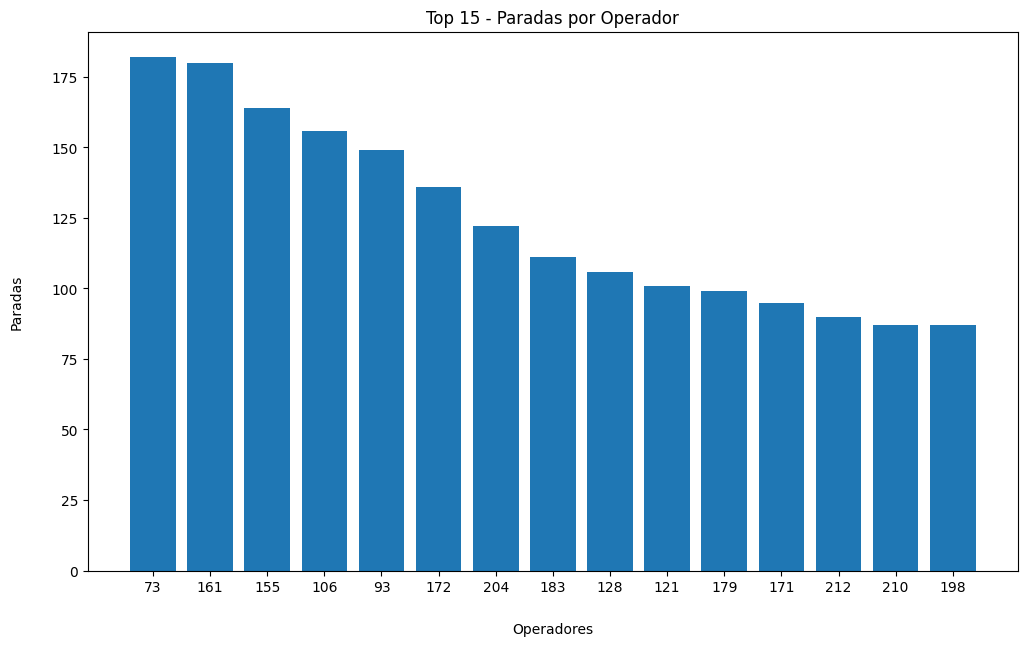

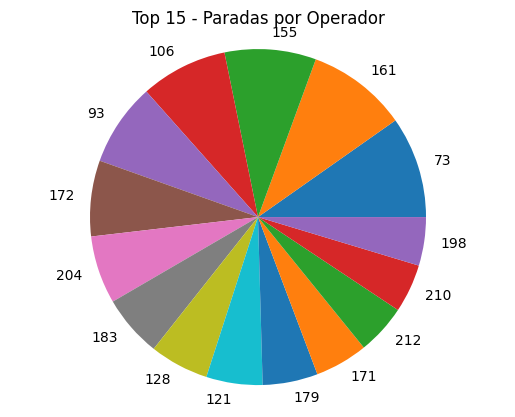

In [39]:
dados_rfm = dados_rfm.sort_values(by='quantidade_parada',ascending=False)
listaOperador = dados_rfm['cod_operador'].astype(str).unique()[:15]

listaParadas = list()
for i in range(len(listaOperador)):
  listaParadas.append(
      dados_rfm[(dados_rfm['cod_operador'] == int(listaOperador[i]))]['quantidade_parada'].sum()
  )
  
plt.figure(figsize=(12,7))
plt.bar(listaOperador, listaParadas)
plt.xticks(listaOperador)
plt.ylabel('Paradas',labelpad=20)
plt.xlabel('Operadores',labelpad=20)
plt.title('Top 15 - Paradas por Operador')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(listaParadas, labels=listaOperador)
ax1.axis('equal')
ax1.set_title('Top 15 - Paradas por Operador')
plt.show()

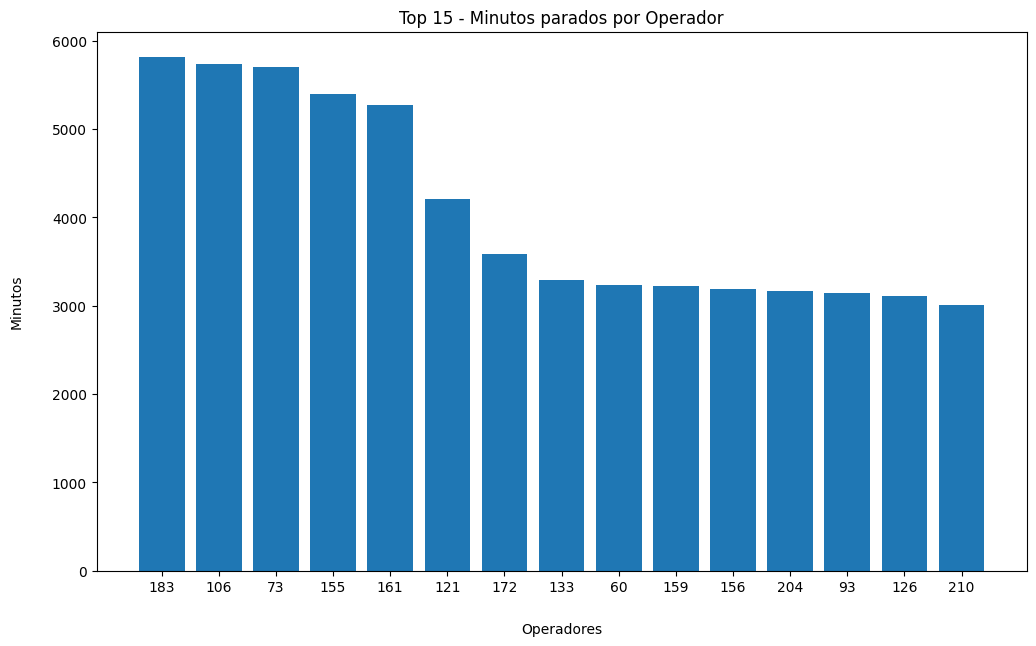

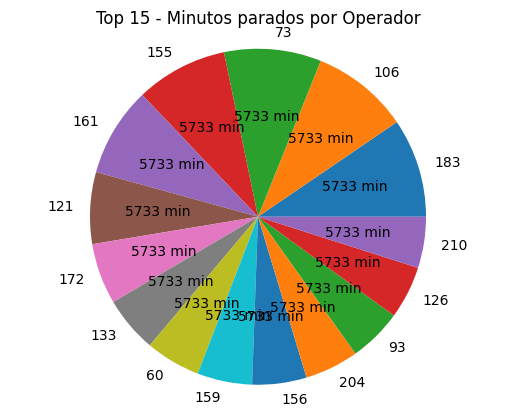

In [58]:
dados_rfm = dados_rfm.sort_values(by='tempo_total_minutos',ascending=False)
listaOperador = dados_rfm['cod_operador'].astype(str).unique()[:15]

listaMinutos = list()
for i in range(len(listaOperador)):
  listaMinutos.append(
      dados_rfm[(dados_rfm['cod_operador'] == int(listaOperador[i]))
      ]['tempo_total_minutos'].sum()
  )

plt.figure(figsize=(12,7))
plt.bar(listaOperador, listaMinutos)
plt.xticks(listaOperador)
plt.ylabel('Minutos',labelpad=20)
plt.xlabel('Operadores',labelpad=20)
plt.title('Top 15 - Minutos parados por Operador')
plt.show()

def func():
  for c in range(len(listaMinutos)):
    c += 1
    return "{:d}".format(int(listaMinutos[c]))

fig1, ax1 = plt.subplots()
ax1.pie(listaMinutos, labels=listaOperador,autopct= lambda pct: func())
ax1.axis('equal')
ax1.set_title('Top 15 - Minutos parados por Operador')
plt.show()

In [57]:
size = len(listaMinutos)
print(size)

15
